# 3. Statistical plots with Seaborn

Ini adalah tur tingkat tinggi dari perpustakaan plotting seaborn untuk menghasilkan grafik statistik dalam Python. Kami akan membahas alat dasar seaborn untuk menghitung dan memvisualisasikan regresi linier, serta alat untuk memvisualisasikan distribusi univariat (seperti strip, swarm, dan violin plots) dan distribusi multivariat (seperti joint plots, pair plots, dan heatmaps). Kami juga akan membahas pengelompokan kategori dalam plot.

## Preparing Data and Library

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import pandas and numpy
import pandas as pd
import numpy as np

# Assign file url
file_auto = 'https://assets.datacamp.com/production/repositories/558/datasets/1a03987ad77b38d61fc4c692bf64454ddf345fbe/auto-mpg.csv'
file_pbdwu = 'https://assets.datacamp.com/production/repositories/558/datasets/5f4f1a9bab95fba4d7fea1ad3c30dcab8f5b9c96/percent-bachelors-degrees-women-usa.csv'
file_stocks = 'https://assets.datacamp.com/production/repositories/558/datasets/8dd58ff003e399765cdf348305783b842ff1d7eb/stocks.csv'

# Load data
auto = pd.read_csv(file_auto)

## Visualizing regressions

### Simple linear regressions

Seperti yang Anda lihat, seaborn menyediakan antarmuka yang nyaman untuk menghasilkan plot statistik yang rumit dan tampak hebat. Salah satu hal paling sederhana yang dapat Anda lakukan menggunakan seaborn adalah untuk menyesuaikan dan memvisualisasikan regresi linear sederhana antara dua variabel menggunakan `sns.lmplot()`.

Salah satu perbedaan antara seaborn dan plot matplotlib reguler adalah bahwa Anda dapat menggunakan pandas DataFrames langsung ke plot dan merujuk ke setiap kolom dengan nama. Misalnya, jika Anda memplot kolom `'price'` vs kolom `'area'` dari DataFrame `df`, Anda dapat memanggil `sns.lmplot(x='area', y='price', data=df)`.

Dalam latihan ini, Anda sekali lagi akan menggunakan DataFrame `auto` yang berisi dataset auto-mpg. Anda akan memplotting regresi linier yang menggambarkan hubungan antara bobot mobil (*weight*) dan tenaga kuda (*horse power*).

In [3]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


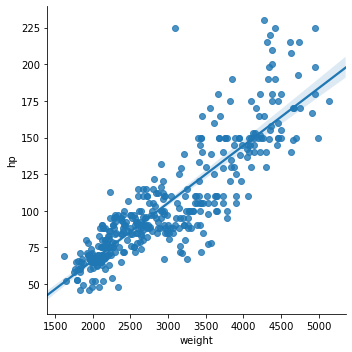

In [4]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show()

**Note** : Tidak mengherankan, ada korelasi kuat antara `'hp'` dan `'weight'`, dan regresi linier dengan mudah dapat menangkap tren ini.

### Plotting residuals of a regression

Seringkali, Anda tidak hanya ingin melihat regresi itu sendiri tetapi juga melihat residu untuk mendapatkan ide yang lebih baik seberapa baik regresi menangkap data. Seaborn menyediakan `sns.residplot()` untuk tujuan itu, memvisualisasikan seberapa jauh titik data berbeda dari garis regresi.

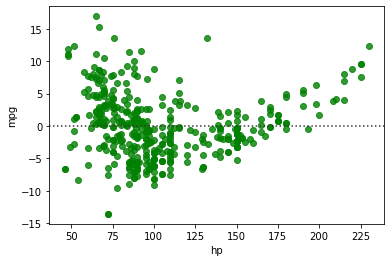

In [5]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()

**Note** : Seaborn membuatnya sangat mudah dan cepat melakukan plot residu regresi, seperti yang ditunjukkan di sini.

### Higher-order regressions

Ketika ada hubungan yang lebih kompleks antara dua variabel, urutan pertama regresi sederhana sering tidak cukup untuk menangkap secara akurat hubungan antara variabel. Seaborn membuatnya mudah untuk menghitung dan memvisualisasikan regresi berbagai urutan.

Di sini, Anda akan melakukan plot regresi urutan kedua antara tenaga kuda (`'hp'`) dan mil per galon (`'mpg'`) menggunakan `sns.regplot()` ( fungsi `sns.lmplot()` adalah antarmuka tingkat tinggi ke `sns.regplot()` ). Namun, sebelum plotting hubungan ini, bandingkan bagaimana residu berubah tergantung pada urutan regresi. Apakah regresi urutan kedua berkinerja lebih baik secara signifikan daripada regresi linier sederhana?

* Perbedaan utama antara `sns.lmplot()` dan `sns.regplot()` adalah cara di mana opsi matplotlib dilewatkan ( `sns.regplot()` lebih permisif ).
* Untuk `sns.lmplot()` dan `sns.regplot()`, keyword `order` digunakan untuk mengontrol urutan regresi polinomial.
* Fungsi `sns.regplot()` menggunakan argumen `scatter=None` untuk mencegah plotting pada titik scatter plot lagi.

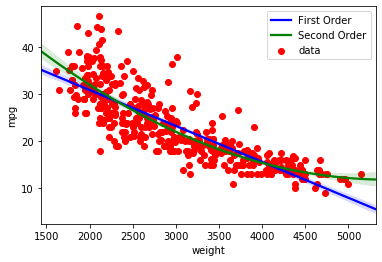

In [6]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='First Order')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='green', label='Second Order', order=2)

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

**Note** : Sepertinya regresi urutan 2 diperlukan untuk menangkap dengan benar hubungan antara `'weight'` dan `'mpg'`.

### Grouping linear regressions by hue

Seringkali berguna untuk membandingkan dan membedakan tren di antara berbagai kelompok. Seaborn memungkinkan untuk menerapkan regresi linier secara terpisah untuk subset data dengan menerapkan operasi *groupby*. Menggunakan argumen `hue`, Anda dapat menentukan variabel kategorikal yang digunakan untuk mengelompokkan pengamatan data. Kelompok poin yang berbeda digunakan untuk menghasilkan regresi yang berbeda dengan hue yang berbeda dalam plot.

Anda dapat melihat hubungan antara bobot (`'weight'`) dan tenaga kuda (`'hp'`) dari mobil dan mengelompokkannya berdasarkan asalnya (`'origin'`), memberikan Anda indikasi visual cepat bagaimana hubungan berbeda berdasarkan benua.

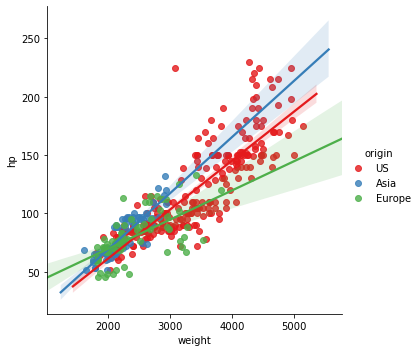

In [7]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight', y='hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show()

**Note** : Sepertinya mobil `US` cenderung memiliki `hp` lebih tinggi.

### Grouping linear regressions by row or column

Daripada overlay regresi linier dari data yang dikelompokkan dalam plot yang sama, kita mungkin ingin menggunakan subplot grid. Fungsi `sns.lmplot()` menerima argumen `row` dan `col` untuk pengaturan subplot regresi.

Anda akan menggunakan keyword argument `row` untuk menampilkan subplot yang diatur dalam baris. Artinya, Anda akan menghasilkan regresi *horsepower vs. weight* yang dikelompokkan berdasarkan benua asal dalam subplot terpisah yang ditumpuk secara vertikal.

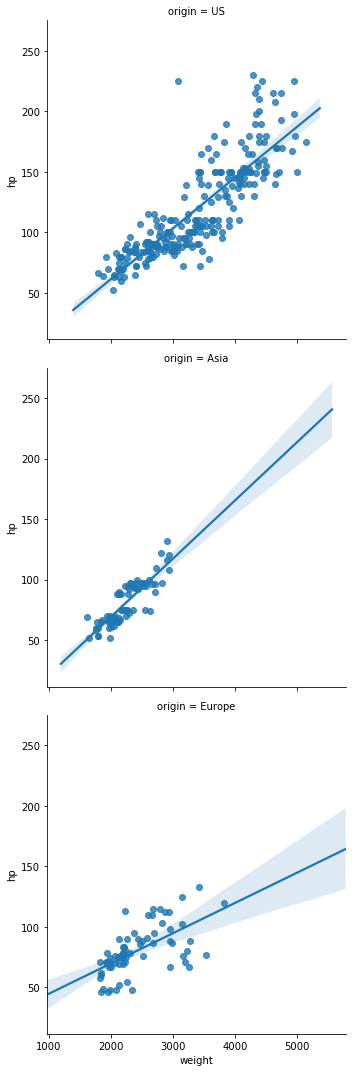

In [8]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, row='origin')

# Display the plot
plt.show()

**Note** : Lebih mudah untuk memahami ketiga garis regresi sekarang karena mereka masing-masing memiliki subplot.

## Visualizing univariate distributions

### Constructing strip plots

Regresi berguna untuk memahami hubungan antara dua variabel continuous. Seringkali kita ingin mengeksplorasi bagaimana distribusi variabel continuous tunggal dipengaruhi oleh variabel kategori kedua. Seaborn menyediakan berbagai jenis plot untuk melakukan perbandingan jenis ini di antara distribusi univariat.

Strip plot adalah salah satu cara memvisualisasikan data semacam ini. Ini plot distribusi variabel untuk setiap kategori sebagai titik data individual. Untuk plot strip vertikal (default), distribusi nilai continuous diletakkan sejajar dengan sumbu y dan kategori yang berbeda ditempatkan di sepanjang sumbu x.

* Sebagai contoh, `sns.stripplot(x='type', y='length', data=df)` menghasilkan urutan plot strip vertikal dari distribusi `length` yang dikelompokkan berdasarkan `type` (dengan asumsi `length` adalah kolom continuous dan `type` adalah kolom kategorikal dari DataFrame `df`).
* Titik yang tumpang tindih bisa sulit dibedakan dalam plot strip. Argumen `jitter=True` membantu menyebarkan poin yang tumpang tindih.
* Argumen matplotlib lainnya dapat diteruskan ke `sns.stripplot()`, mis. `marker`, `color`, `size`, dll.

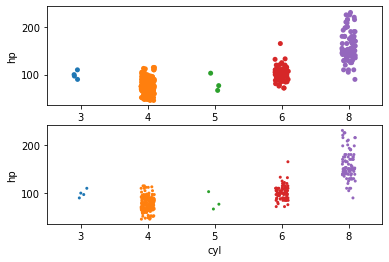

In [9]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=3)

# Display the plot
plt.show()

**Note** : Di sini, `'hp'` adalah variabel continuous, dan `'cyl'` adalah variabel kategorikal. Strip plot menunjukkan bahwa mobil dengan silinder lebih banyak cenderung memiliki tenaga kuda yang lebih tinggi.

### Constructing swarm plots

Seperti yang telah Anda lihat, strip plot dapat ramai secara visual bahkan dengan jitter yang diterapkan dan ukuran titik yang lebih kecil. Alternatif disediakan oleh plot swarm ( `sns.swarmplot()` ), yang sangat mirip tetapi menyebar poin untuk menghindari tumpang tindih dan memberikan gambaran visual yang lebih baik dari data.

* Sintaks untuk `sns.swarmplot()` mirip dengan `sns.stripplot()`, mis., `sns.swarmplot(x='type', y='length', data=df)`.
* Orientasi untuk variabel continuous dalam plot strip/swarm dapat disimpulkan dari pilihan kolom `x` dan `y` dari DataFrame `data`. Orientasi dapat diatur secara eksplisit menggunakan `orient='h'` (horizontal) atau `orient='v'` (vertikal).
* Pengelompokan lain dapat ditambahkan menggunakan keyword `hue`. Misalnya, menggunakan `sns.swarmplot(x='type', y='length', data=df, hue='build year')` membuat swarm plot dari DataFrame `df` dengan nilai kolom `'length'` tersebar secara vertikal, dikelompokkan secara horizontal berdasarkan kolom `'type'` dan setiap titik diwarnai oleh kolom kategorik `'build year'`.

Dalam latihan ini, Anda akan menggunakan DataFrame `auto` lagi untuk menggambarkan penggunaan `sns.swarmplot()` dengan pengelompokan berdasarkan `hue` dan dengan spesifikasi eksplisit dari orientasi menggunakan keyword `orient`.

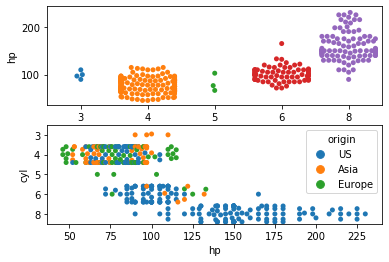

In [10]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

# Display the plot
plt.show()

**Note** : Swarm plots umumnya lebih mudah dipahami daripada plot strip karena mereka menyebar poin untuk menghindari tumpang tindih.

### Constructing violin plots

Baik plot strip dan swarm memvisualisasikan semua titik data. Untuk kumpulan data besar, ini dapat menghasilkan overplotting yang signifikan. Oleh karena itu, seringkali berguna untuk menggunakan tipe plot yang mengurangi dataset menjadi statistik yang lebih deskriptif dan memberikan ringkasan data yang baik. Box plot and whisker adalah cara klasik untuk meringkas distribusi univariat tetapi seaborn memberikan ekstensi yang lebih canggih dari box plot standar, yang disebut plot violin.

Di sini, Anda akan menghasilkan plot violin dari distribusi tenaga kuda (`'hp'`) dengan jumlah silinder (`'cyl'`). Selain itu, Anda akan menggabungkan dua tipe plot yang berbeda dengan cara overlay plot strip pada plot violin.

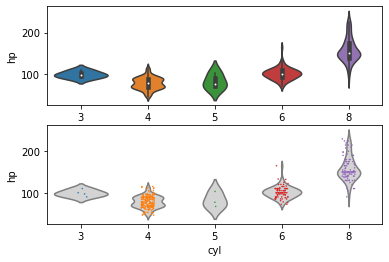

In [11]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, size=1.5, jitter=True)

# Display the plot
plt.show()

**Note** : Seperti yang Anda lihat, plot violin adalah cara yang bagus untuk memvisualisasikan hubungan antara variabel continuous dan variabel kategorikal.

## Visualizing multivariate distributions

### Plotting joint distributions (1)

Ada banyak strategi untuk memvisualisasikan bagaimana pasangan variabel acak continuous bervariasi bersama. Regresi dan plot residu adalah salah satu strategi. Cara lain adalah memvisualisasikan *distribusi bivariat*.

`sns.jointplot()` milik Seaborn menyediakan sarana untuk memvisualisasikan distribusi bivariat. Sintaks panggilan dasar mirip dengan `sns.lmplot()`. Secara default, memanggil `sns.jointplot(x, y, data)` merender beberapa hal:

* Scatter plot menggunakan kolom yang ditentukan `x` dan `y` dari DataFrame `data`.
* Histogram (univariat) di sepanjang bagian atas scatter plot menunjukkan distribusi kolom `x`.
* Histogram (univariat) di sepanjang kanan scatter plot menunjukkan distribusi kolom `y`.

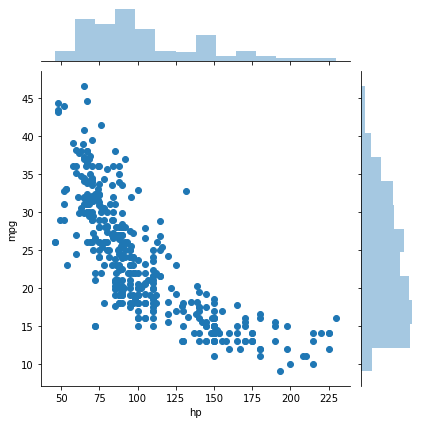

In [12]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()

**Note** : Dalam latihan berikutnya, Anda akan belajar bagaimana memperluas plot ini dengan menentukan parameter `kind`.

### Plotting joint distributions (2)

Fungsi seaborn `sns.jointplot()` memiliki parameter `kind` untuk menentukan cara memvisualisasikan variasi gabungan dari dua variabel acak continuous (mis., Dua kolom DataFrame).

* `kind='scatter'` menggunakan scatter plot untuk data points
* `kind='reg'` menggunakan regression plot (default order 1)
* `kind='resid'` menggunakan residual plot
* `kind='kde'` menggunakan estimasi kepadatan kernel dari joint distribution
* `kind='hex'` menggunakan plot hexbin dari joint distribution

Untuk latihan ini, Anda akan kembali menggunakan `sns.jointplot()` untuk menampilkan distribusi bersama kolom `hp` dan `mpg` dari DataFrame `auto`. Kali ini, Anda akan menggunakan `kind='hex'` untuk menghasilkan plot hexbin dari  joint distribution.

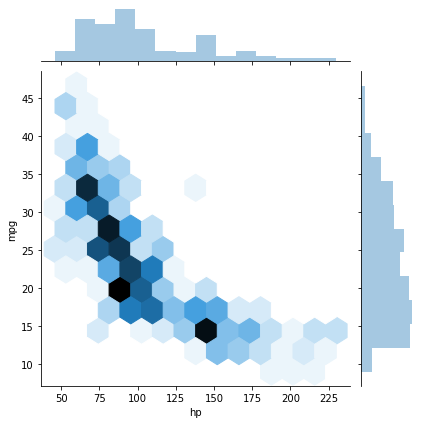

In [13]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()

### Plotting distributions pairwise (1)

Kumpulan data sering mengandung lebih dari dua variabel continuous. Fungsi `sns.jointplot()` dibatasi untuk merepresentasikan variasi joint antara dua kuantitas (mis., Dua kolom DataFrame). Memvisualisasikan hubungan multivarian lebih sulit.

Fungsi `sns.pairplot()` membuat grid dari semua joint plot berpasangan dari semua pasangan kolom (non-kategorikal) dalam DataFrame. Sintaksnya sangat sederhana: `sns.pairplot(df)`, di mana `df` adalah DataFrame. Kolom non-kategorikal diidentifikasi dan joint plot yang sesuai diplot dalam kotak persegi subplot. Diagonal dari grid anak petak menunjukkan histogram univariat dari masing-masing kolom.

In [15]:
# Load data
auto = auto[['mpg', 'hp', 'origin']]

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


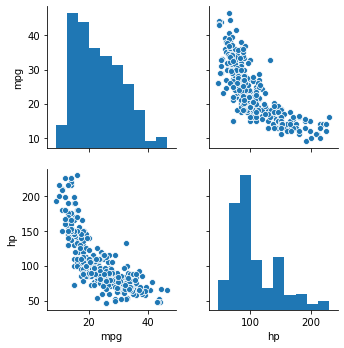

In [16]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto)

# Display the plot
plt.show()

**Note** : Seaborn pairplots adalah cara terbaik untuk memvisualisasikan hubungan antara semua variabel continuous dalam dataset.

### Plotting distributions pairwise (2)

Dalam latihan ini, Anda akan menghasilkan distribusi gabungan berpasangan lagi. Kali ini, Anda akan membuat dua tambahan khusus:

* Anda akan menampilkan regresi dan juga scatter plot di subplot off-diagonal. Anda akan melakukan ini dengan argumen `kind='reg'` (di mana `'reg'` berarti 'regresi'). Pilihan lain untuk `kind` adalah `'scatter'` (default) dimana scatter plot di sub-plot off-diagonal.
* Anda juga akan memvisualisasikan distribusi bersama yang dipisahkan oleh benua asal. Anda akan melakukan ini dengan keyword argument `hue` yang menentukan `'origin'`.

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


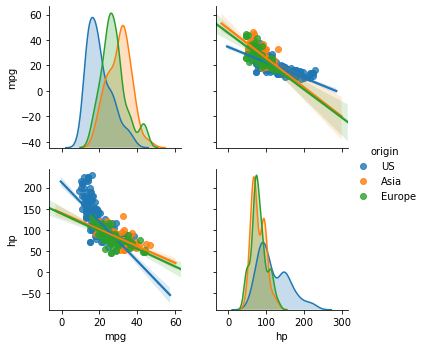

In [17]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto, kind='reg', hue='origin')

# Display the plot
plt.show()

**Note** : Plot seperti ini adalah alasan mengapa Seaborn adalah perpustakaan yang sangat berguna: Menggunakan hanya satu perintah, Anda dapat dengan cepat mengekstraksi banyak wawasan berharga dari sebuah dataset.

### Visualizing correlations with a heatmap

Plotting hubungan antara banyak variabel menggunakan pair plot dapat dengan cepat membuat Anda kewalahan secara visual. Oleh karena itu sering berguna untuk menghitung kovarian antara variabel sebagai gantinya. Matriks kovarians kemudian dapat dengan mudah divisualisasikan sebagai *heatmap*. Heatmap secara efektif merupakan pseudocolor plot dengan baris dan kolom berlabel (mis., Pseudocolor plot berdasarkan pandas DataFrame daripada matriks). DataFrame tidak harus persegi atau simetris (tetapi, dalam konteks matriks kovarian, keduanya).

Dalam latihan ini, Anda akan melihat matriks kovarians antara variabel continuous dalam dataset auto-mpg. Anda tidak perlu tahu di sini bagaimana matriks kovarians dihitung; titik yang penting adalah bahwa entri diagonal semuanya 1s, dan entri off-diagonal adalah antara -1 dan +1 (menghitung derajat di mana pasangan variabel bervariasi secara bersama-sama). Ini juga merupakan matriks simetris.

In [35]:
# Load data
auto = pd.read_csv(file_auto)
auto = auto[['mpg', 'hp', 'weight', 'accel', 'displ']]

In [39]:
# Print the covariance matrix
cov_matrix = auto.corr()
cov_matrix

,mpg,hp,weight,accel,displ
mpg,1.000000,-0.778427,-0.832244,0.423329,-0.805127
hp,-0.778427,1.000000,0.864538,-0.689196,0.897257
weight,-0.832244,0.864538,1.000000,-0.416839,0.932994
accel,0.423329,-0.689196,-0.416839,1.000000,-0.543800
displ,-0.805127,0.897257,0.932994,-0.543800,1.000000


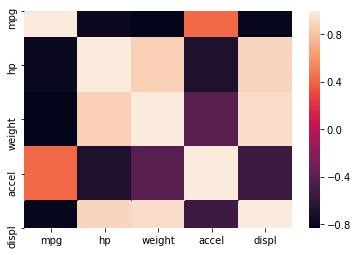

In [38]:
# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()